In [1]:
library(foreach)
library(ggplot2)

### Read input data

In [2]:
df_mode <- read.delim("./results/chromosomes_pop_label_mode.txt")
samples <- read.delim('./data/AMR_pop_all_samples.txt', header=FALSE)$V1
chromosomes <- as.character(1:22)

### Calculate agreement proportion for pairs of methods

In [4]:
methods_compare <- list(c("gnomix", "gnomix"), c("rfmix", "rfmix"), c("rfmix", "gnomix"))

df_comp <- foreach(i=1:length(methods_compare), .combine="rbind", .errorhandling="remove") %do% {
    m1 <- methods_compare[[i]][1]
    m2 <- methods_compare[[i]][2]

    df_sample <- foreach(s=samples, .combine="rbind", .errorhandling="remove") %do% {
        agree <- sum(df_mode[paste0(s, "_", m1)]==df_mode[paste0(s, "_", m2)])
        prop <- agree/length(chromosomes)
        data.frame(sample=s, agree_prop=prop)
    }

    median_prop <- median(df_sample$agree_prop)
    data.frame(method_1=m1, method_2=m2, med_prop=round(median_prop, 2))
}


### Plot heatmap

png 
  2

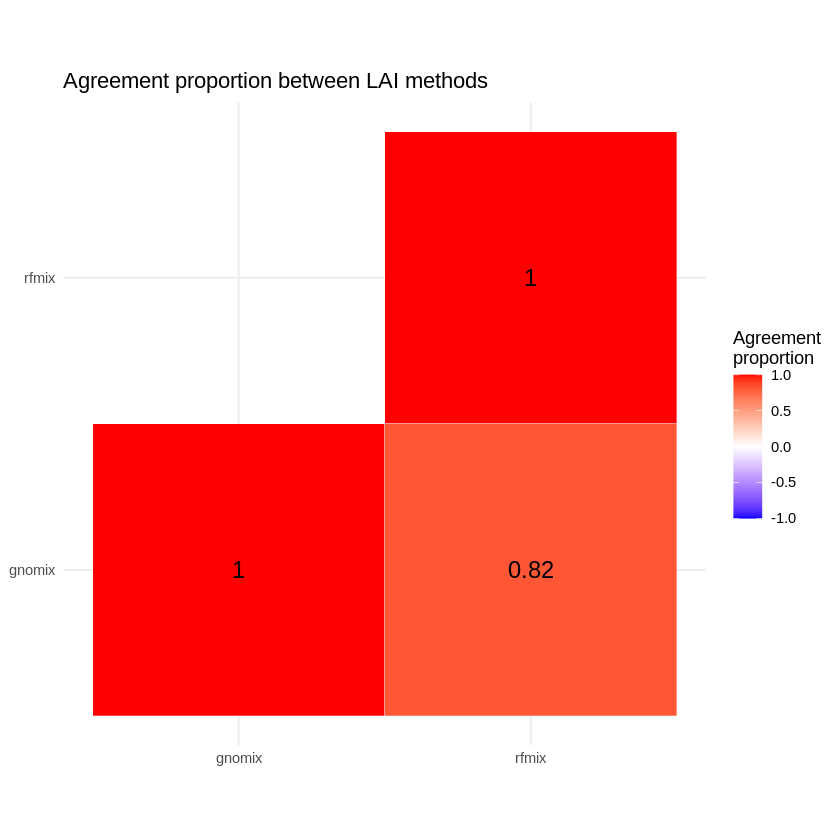

In [5]:
ggheatmap <- ggplot(df_comp, aes(method_1, method_2, fill = med_prop))+
    geom_tile(color = "white") + 
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
        midpoint = 0, limit = c(-1,1), space = "Lab", name="Agreement\nproportion") + 
    labs(title="Agreement proportion between LAI methods") +
    theme_minimal() + coord_fixed() +
    geom_text(aes(method_1, method_2, label = med_prop), color = "black", size = 5) +
    theme(axis.title.x = element_blank(),
        axis.title.y = element_blank())

print(ggheatmap)

pdf("./results/agreement_proportion_heatmap.pdf", height=5, width=5)
print(ggheatmap)
dev.off()
